#### __Data Visualization With Python__

In [2]:
import pandas as pd

In [4]:
df = pd.read_csv(r"C:\Users\user\Downloads\Africa_climate_change.csv")

In [5]:
df['DATE'] = df['DATE'].astype(str).str[:8]
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')

df = df.drop(columns=['PRCP'])
df = df.dropna(subset=['TAVG'])

df['YEAR'] = df['DATE'].dt.year

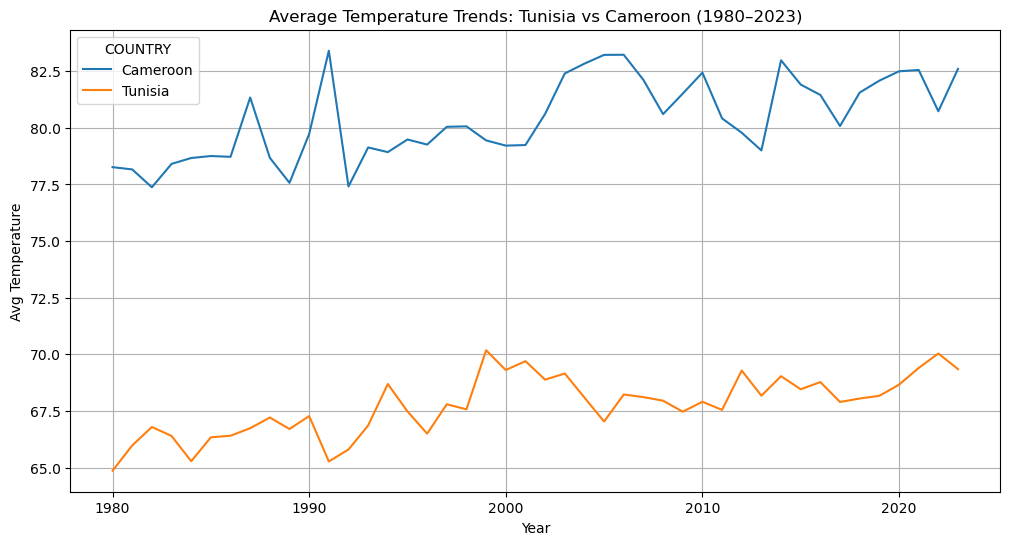

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
# Filter data
countries = ['Tunisia', 'Cameroon']
df_filtered = df[df['COUNTRY'].isin(countries)]
# Group by year and the country
line_data = df_filtered.groupby(['YEAR', 'COUNTRY'])['TAVG'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=line_data, x='YEAR', y='TAVG', hue='COUNTRY')
plt.title("Average Temperature Trends: Tunisia vs Cameroon (1980–2023)")
plt.xlabel("Year")
plt.ylabel("Avg Temperature")
plt.grid(True)
plt.show()

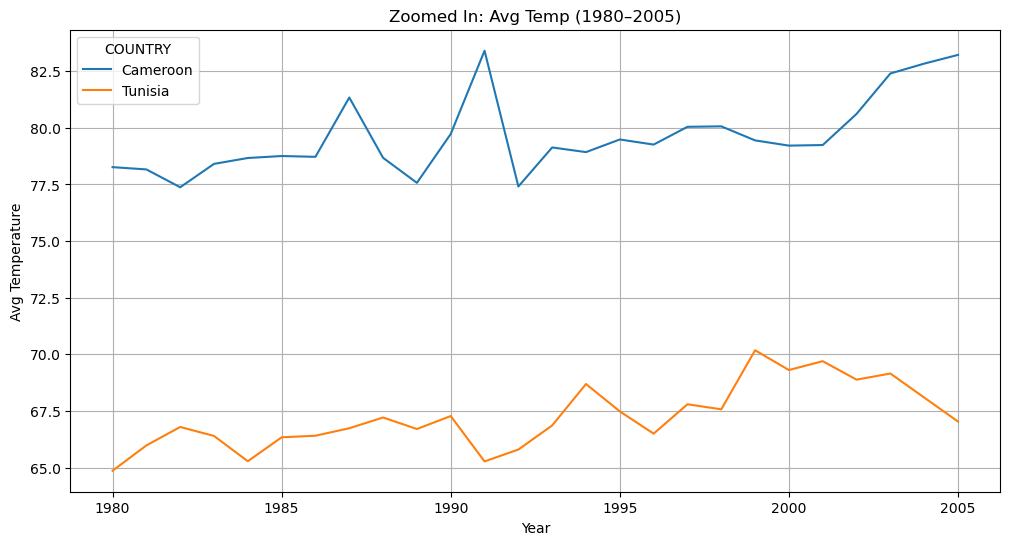

In [7]:
line_zoom = line_data[(line_data['YEAR'] >= 1980) & (line_data['YEAR'] <= 2005)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=line_zoom, x='YEAR', y='TAVG', hue='COUNTRY')
plt.title("Zoomed In: Avg Temp (1980–2005)")
plt.xlabel("Year")
plt.ylabel("Avg Temperature")
plt.grid(True)
plt.show()

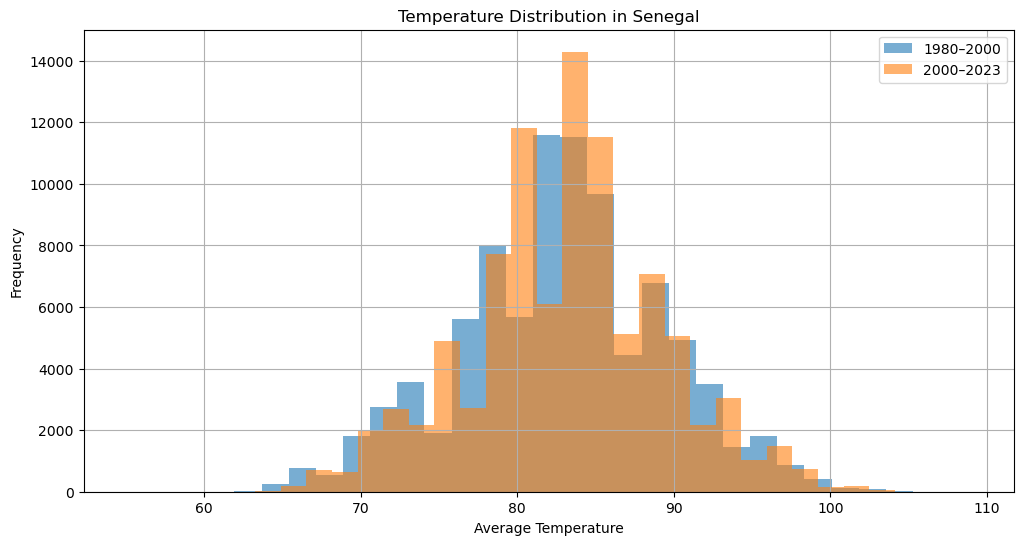

In [8]:
senegal = df[df['COUNTRY'] == 'Senegal']

# Split periods
senegal_80_00 = senegal[(senegal['YEAR'] >= 1980) & (senegal['YEAR'] <= 2000)]
senegal_00_23 = senegal[(senegal['YEAR'] > 2000) & (senegal['YEAR'] <= 2023)]

# Plot histograms
plt.figure(figsize=(12, 6))
plt.hist(senegal_80_00['TAVG'], bins=30, alpha=0.6, label='1980–2000')
plt.hist(senegal_00_23['TAVG'], bins=30, alpha=0.6, label='2000–2023')
plt.title("Temperature Distribution in Senegal")
plt.xlabel("Average Temperature")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

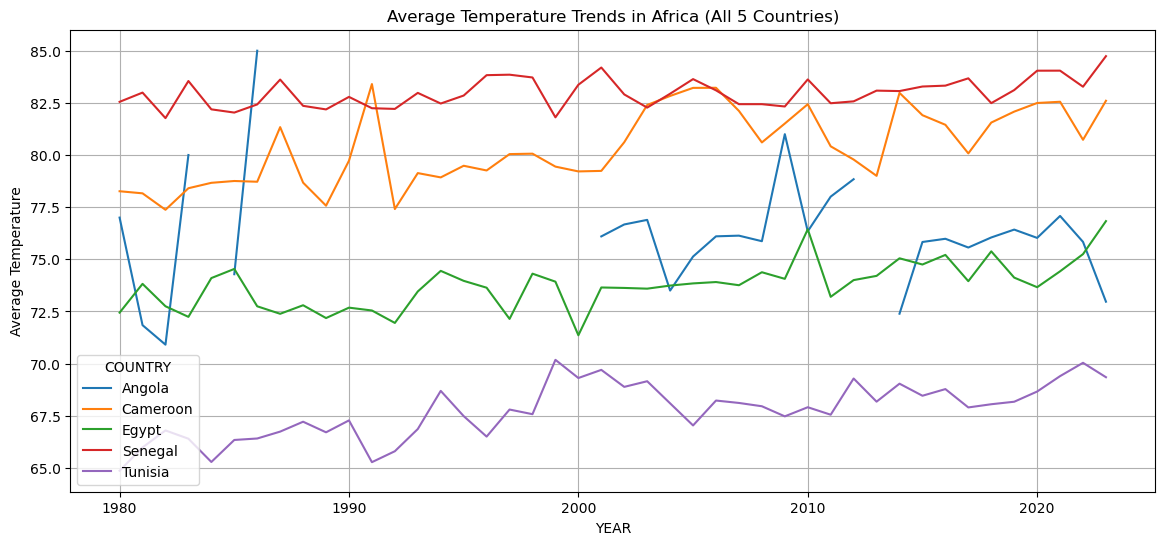

In [9]:
temp_trend = df.groupby(['YEAR', 'COUNTRY'])['TAVG'].mean().reset_index()
pivot = temp_trend.pivot(index='YEAR', columns='COUNTRY', values='TAVG')

# Plot
pivot.plot(figsize=(14, 6))
plt.title("Average Temperature Trends in Africa (All 5 Countries)")
plt.ylabel("Average Temperature")
plt.grid(True)
plt.show()